In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [27]:
def dots_detect(image, threshold, dice_size, point_size):
    
    _, binary_image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)

    
    kernel = np.ones((5, 5), np.uint8)
    binary_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)
    
   
    plt.figure(figsize=(10, 10))
    plt.imshow(binary_image, cmap='gray')
    plt.axis('off')
    plt.show()
    
    contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    
    dices = {}

    for idx, contour in enumerate(contours):
        area = cv2.contourArea(contour)
        sub_hierarchy = hierarchy[0][idx]
        parent_idx = sub_hierarchy[3]

        if area > dice_size and parent_idx == -1:
            dices[idx] = 0
        elif area > point_size and parent_idx != -1 and parent_idx in dices:
            dices[parent_idx] += 1

 
    dices = {key: value for key, value in dices.items() if value > 0}
    
    for idx, (key, value) in enumerate(dices.items()):
        print(f'Dice {idx + 1}: {value}')
        
    return dices


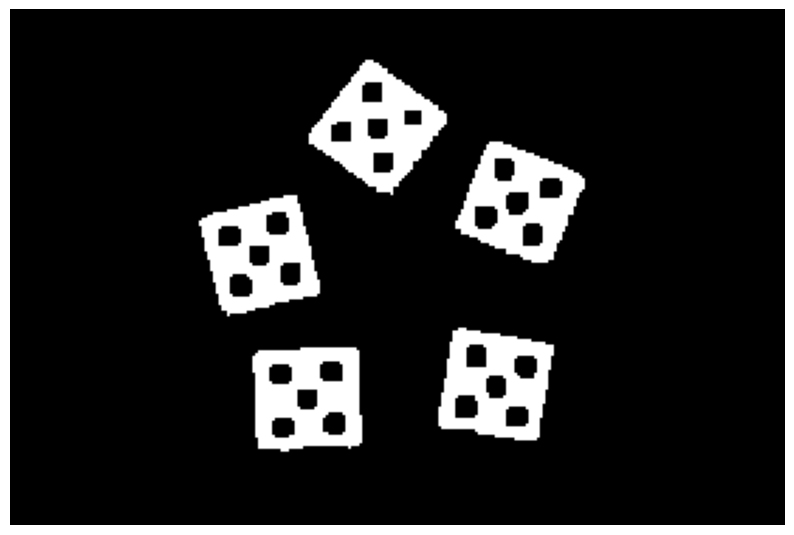

Dice 1: 5
Dice 2: 5
Dice 3: 5
Dice 4: 5
Dice 5: 5


In [36]:
image = cv2.imread('image-_3_.png', cv2.IMREAD_GRAYSCALE)
detected_dots = dots_detect(image, threshold=230, dice_size=1000, point_size=30)

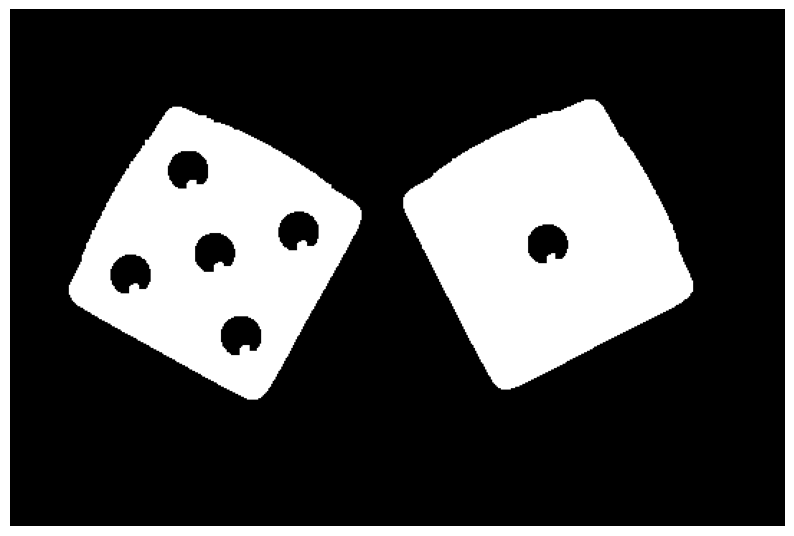

Dice 1: 5
Dice 2: 1
{0: 5, 6: 1}


In [40]:
image = cv2.imread('image-_1_.png', cv2.IMREAD_GRAYSCALE)
detected_dots = dots_detect(image, threshold=100, dice_size=1000, point_size=150)

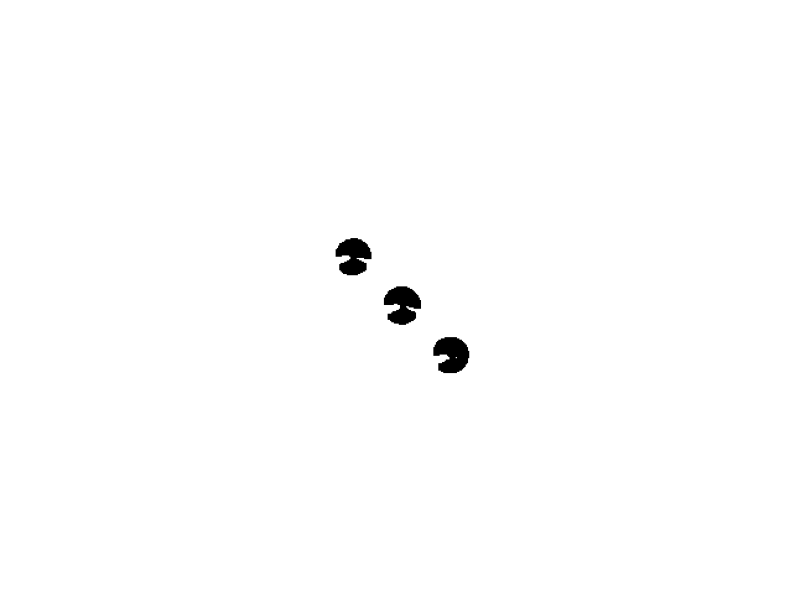

Dice 1: 3


In [55]:
image = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)
detected_dots = dots_detect(image, threshold=80, dice_size=500, point_size=40)

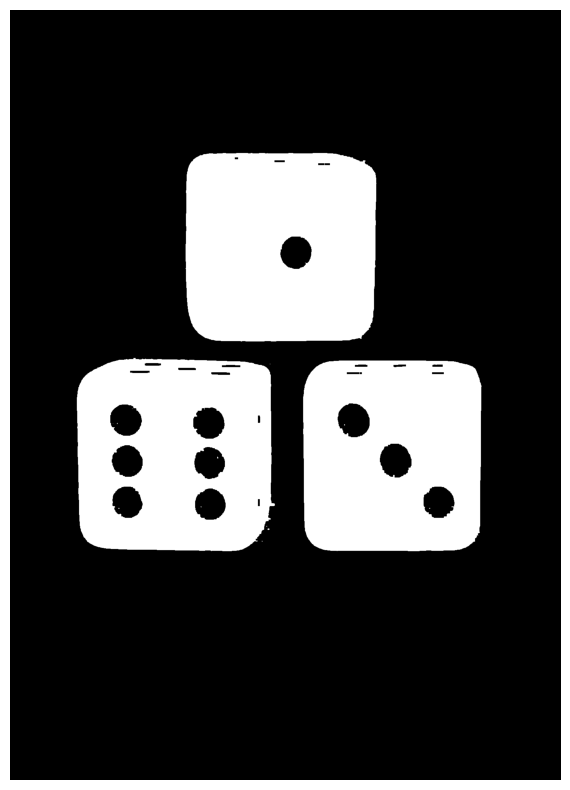

Dice 1: 3
Dice 2: 6
Dice 3: 1


In [94]:
image = cv2.imread('image_2.jpg', cv2.IMREAD_GRAYSCALE)
detected_dots = dots_detect(image, threshold=40, dice_size=1000, point_size=500)